# Detecting Payment Fraud in Finance Industry using Machine Learning based Techniques

### Yu Shing Lui
### A0201746

### Descriptive Analysis

In [2]:
#Mathematical operations
import numpy as np

#Data manipulation
import pandas as pd

#Data visulaization 
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling, for standardizatiom
from sklearn. preprocessing import StandardScaler, MinMaxScaler

#Splitting data libraries and finding the best parameters
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV

#Finding accuracy score, confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression for calssification
from sklearn.linear_model import LogisticRegression

#K-nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Evaluate a model
from sklearn.metrics import classification_report

#Oversample the minority class
from imblearn.over_sampling import SMOTE
from collections import Counter

#Record execution time in python
import time

#Shuffle data frame rows
from sklearn.utils import shuffle

##### Loading the dataset

In [3]:
dataset = pd.read_csv('banksim.csv')

df = pd.DataFrame(dataset)

##### Showing how many rows and columns in the dataset


In [4]:
df.shape

(594643, 10)

In this dataset, it has 594,643 rows and 10 columns. It includes the features of step, customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, and fraud. The details of each feature will show as below, and it will understand how they process for classification.

##### Showing the first five rows of data


In [5]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


1.	Step
It represents the number of days for the transaction in this dataset. The range of this dataset contains around six months in total. 

2.	Customer
It can identify each bank customer with unique ID for their transaction. Although it is a unique identifier, it does not have any sensitive information for the customers. All customers unique code will convert to integer for analyzing in machine learning models.
 
3.	Age
Each code indicates specific age range of each customer. It has eight categories to represent the customer age range and needs to change the value of string to integer format for further usage

4.	Gender
Each code shows the gender type of each customer. There are four categories, which are enterprise, female, male and unknown column. 

5.	Zip Code Origin
This column shows the zip code of each customer. However, it can find that all the zip codes are the same and it is no reason to use this feature. It will not have any impact for the result because of no difference of all of rows.

6.	Merchant
It can identify each receiver with unique ID for their transaction. Although it is a unique identifier, it does not have any sensitive information for the merchant. All the merchant unique code will convert to integer for analyzing in machine learning models.

7.	Zip Merchant
This column shows the zip merchant of each merchant. However, it is the same result of the feature of Zip Code Origin which all the zip codes are the same and it is no reason to use this feature. It will not have any impact for the result because of no difference of all of rows.

8.	Category
This feature represents all categories for each transaction belongs to. It has the same situation as other features. The column of category needs to change the value of string to integer format for further usage. Otherwise, it cannot support for analyzing in machine learning models.

9.	Amount
Due to the transactions of this dataset are from Spain, Europe. We believe that this feature of the amount should be in Euro and the values are numeric format with decimal values.

10.	Fraud
It uses boolean format for this column of each transaction. The value of 1 means the transaction is fraud. Otherwise, the value of 0 means the transaction is non-fraud.

##### Looking for the type of each attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


##### Checking any missing data in the dataset

In [7]:
df.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

##### Shuffle data frame rows

In [8]:
df = shuffle(df)

##### Counting the number of fraud and non-fraud transaction

In [9]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

We see that non-fraudulent instances represent 98.8% of the total, and the imbalance of the dataset can be corroborated.

In [10]:
df['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

There are 15 different types of category, the most recurring being es_transportation, which covers 85% of transactions.

##### The mean of amount and percentage of fraud by category

In [11]:
df.groupby('category')['amount','fraud'].mean()

<ipython-input-11-b8f286270c14>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('category')['amount','fraud'].mean()


,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


It seems that leisure (es_leisure) and travel (es_travel) are the categories most selected by fraudsters.

The fraudsters chose the categories in which people spend the most on average.

To confirm the above, two Dataframes are created differentiating fraudulent transactions from those that are not.

In [12]:
fraud = df.loc[df.fraud == 1] 
non_fraud = df.loc[df.fraud == 0]

In [13]:
pd.concat([fraud.groupby('category')['amount'].mean(),non_fraud.groupby('category')['amount'].mean(),\
           df.groupby('category')['fraud'].mean()*100],keys=["Fraud","Non-Fraud","Presentage(%)"],axis=1,\
          sort=False).sort_values(by=['Presentage(%)'],ascending=False)

,Fraud,Non-Fraud,Presentage(%)
category,,,
'es_leisure',300.286878,73.230400,94.989980
'es_travel',2660.802872,669.025533,79.395604
'es_sportsandtoys',345.366811,88.502738,49.525237
'es_hotelservices',421.823339,106.548545,31.422018
'es_otherservices',316.469605,75.685497,25.000000
'es_home',457.484834,113.338409,15.206445
'es_health',407.031338,103.737228,10.512614
'es_tech',415.274114,99.924638,6.666667
'es_wellnessandbeauty',229.422535,57.320219,4.759380


According to last figure, we can say that for a certain type of category, a fraudulent transaction will have a much higher amount which is about four times or more than the mean of amount of that category.

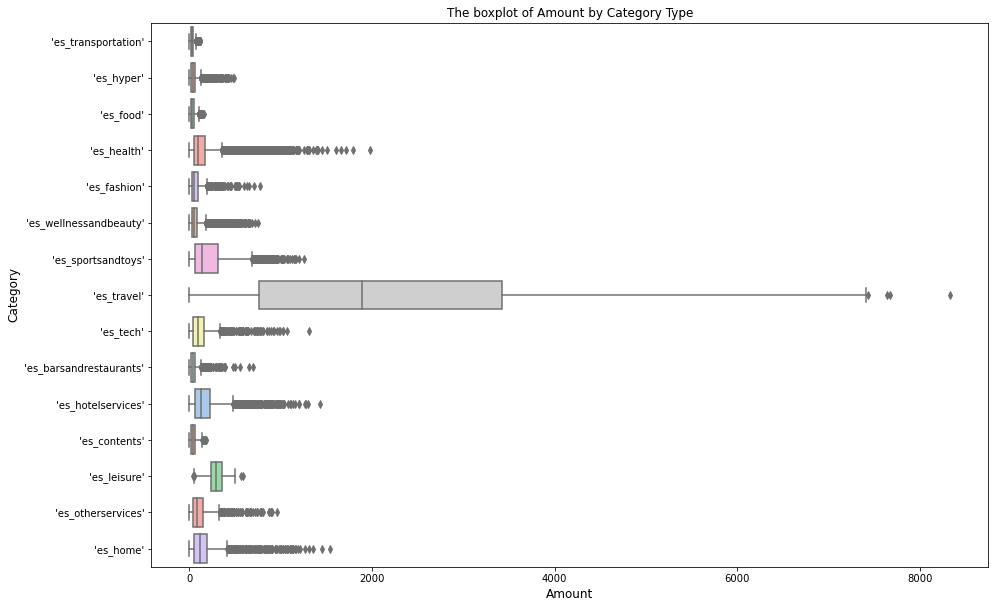

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x = 'amount', y = 'category', palette='pastel')
plt.title("The boxplot of Amount by Category Type", fontsize=12)
plt.xlabel("Amount",fontsize=12)
plt.ylabel("Category",fontsize=12)
plt.show()

The box plots of the amount incurred from fraudulent and non-fraudulent transactions which are plotted by category type.

The categories have a similar average amount which is between 0 and 500 or 600 perhaps (ruling out widely dispersed outliers).

The observable exception is the travel category, the amount is above average of the other categories.

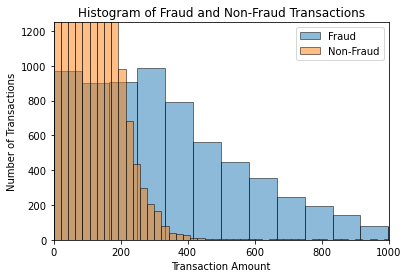

In [15]:
plt.hist(data = fraud, x = 'amount', alpha=0.5, label='Fraud',bins=100,edgecolor="black")
plt.hist(data = non_fraud, x = 'amount', alpha=0.5, label='Non-Fraud',bins=100,edgecolor="black")
plt.title("Histogram of Fraud and Non-Fraud Transactions")
plt.xlabel('Transaction Amount');
plt.ylabel('Number of Transactions');
plt.ylim(0,1250)
plt.xlim(0,1000)
plt.legend()
plt.show()

Once again we can see in the histogram, the fradulent transactions are less in quantity but more in amount.

With amounts greater than 400, we could already suspect that there is fraud.

##### Fraud Analysis by Age

In [15]:
df['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

As we saw previously, the transactions are categorized by age group, and the category 'U' represents the unknown ages.

The bands that carried out the most transactions are 2, 3 and 4 (in that order), that is, those who are between 26 and 55 years old. Since they are people of working age and who are also have adapted to the use of technological tools.

##### Analysis of the feature Steps

In [16]:
df['step'].value_counts()

175    3774
177    3758
152    3746
178    3743
174    3743
       ... 
5      2525
3      2499
2      2462
0      2430
1      2424
Name: step, Length: 180, dtype: int64

As stated above, step represents the day since the start of the simulation and it is 180 days totally.

Apparently, the distribution of the data for each day seems quite balanced. The day with the most transactions (day 175) representing 0.6% in total. The day with the last transactions (day 1) representing 0.4% which shows an evolution of the number of transactions of 0.03% per month.

##### Analysis of the feature Gender

In [17]:
df['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

The Female and Male genders are the ones that carried out the most transactions.

##### Analysis of the feature Customer

In [18]:
df['customer'].value_counts()

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1156745710'      6
'C1345586046'      6
'C1743702978'      5
'C1404665203'      5
'C1809646275'      5
Name: customer, Length: 4112, dtype: int64

We have a total of 4,112 clients.

The client with the highest number of transactions is 'C1978250683', with 265 transactions (which represents 0.04% of total transactions).

This feature does not seem to be a determining variable when it comes to establishing whether a transaction is fraudulent or not.

##### Analysis of the feature Zip Codes

In [19]:
df['zipcodeOri'].value_counts()

'28007'    594643
Name: zipcodeOri, dtype: int64

##### Analysis of the feature Zip Merchant

In [20]:
df['zipMerchant'].value_counts()

'28007'    594643
Name: zipMerchant, dtype: int64

There is only one type of Zip Code Origin and Merchant, so it is no meaning to analysis after on.

##### Analysis of the feature Merchant

In [21]:
df['merchant'].value_counts()

'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M1788569036'   

There are 50 merchants in total. The highest number of transactions is 'M1823072687', which has 299,693 transactions (50.4% of total transactions) and the second is 'M348934600' which has 205,426 operations (34.5%).

Between the first and second merchant with the most operations, they represent 84.9% of total transactions.

In [22]:
mer_frame = pd.concat([fraud.groupby('merchant')['amount'].mean(),non_fraud.groupby('merchant')['amount'].mean(),\
           df.groupby('merchant')['fraud'].mean()*100],keys=["Fraud","Non_fraud","Percentage"],axis=1,\
          sort=False).sort_values(by=['Percentage'],ascending=False)

print(round(mer_frame, 2))

                 Fraud  Non_fraud  Percentage
merchant                                     
'M1294758098'   297.87      74.01       96.34
'M3697346'      301.82      72.93       94.16
'M1873032707'   419.69     100.17       86.40
'M732195782'   2608.07     696.47       85.20
'M980657600'    343.28      85.27       83.21
'M1353266412'   440.32      92.13       82.05
'M857378720'    434.38     116.58       75.41
'M2080407379'  2877.32     566.10       75.00
'M2011752106'   423.17     111.63       68.03
'M17379832'     342.11      93.38       63.12
'M2122776122'   469.45     114.26       58.65
'M480139044'    406.86     103.30       46.58
'M1741626453'   324.55      84.07       37.12
'M495352832'   3474.22     629.12       34.78
'M923029380'    434.03     100.38       31.58
'M1888755466'   316.47      75.69       25.00
'M1198415165'   224.00      56.72       22.66
'M933210764'    322.46      84.12       17.39
'M1748431652'   205.93      56.95       13.14
'M547558035'    247.01      61.45 

The type of merchant seems to be important when establishing whether or not a transaction is fraudulent, according to the average expense shown for each of them.

A merchant that presents a high average amount in its operations. For example, a certain travel agency.

### Data Preprocessing

In [23]:
df2 = df.drop(['customer','zipcodeOri','zipMerchant'],axis=1)

df2.head()

,step,age,gender,merchant,category,amount,fraud
558842,170,'5','F','M348934600','es_transportation',23.29,0
477295,148,'2','F','M348934600','es_transportation',8.13,0
47151,18,'4','M','M348934600','es_transportation',0.44,0
439875,138,'2','F','M1600850729','es_fashion',25.93,0
521435,160,'3','M','M151143676','es_barsandrestaurants',22.91,0


The 3 eliminated features are considered not very relevant for our analysis, according to what was stated in the previous points.

In [24]:
df2.dtypes

step          int64
age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

The transformation of the data will be carried out.

The categorical features will be transformed to numerical values.

The ideal would be to perform dummies, but due to the size of the dataset (around 600,000 rows) it could take too long.

In [25]:
for col_name in df2.columns:
    if(df2[col_name].dtype == 'object'):
        df2[col_name]= df2[col_name].astype('category')
        df2[col_name] = df2[col_name].cat.codes   

df2.head()

,step,age,gender,merchant,category,amount,fraud
558842,170,5,1,30,12,23.29,0
477295,148,2,1,30,12,8.13,0
47151,18,4,2,30,12,0.44,0
439875,138,2,1,11,2,25.93,0
521435,160,3,2,9,0,22.91,0


In [26]:
df2.dtypes

step          int64
age            int8
gender         int8
merchant       int8
category       int8
amount      float64
fraud         int64
dtype: object

The expected data type conversion was obtained.

##### Finding the correlations cross with the features

<AxesSubplot:>

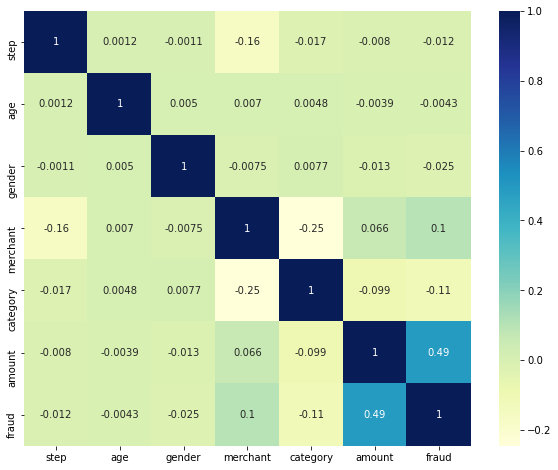

In [27]:
df_corr = df2.corr()
features = df_corr.index
plt.figure(figsize=(10,8))
sns.heatmap(df2[features].corr(), annot=True, cmap='YlGnBu')

There is a positive correlation between Fraud and Amount incurred in the transaction, although it is not very high.

##### Using boxplot to show the dataframe 

<AxesSubplot:>

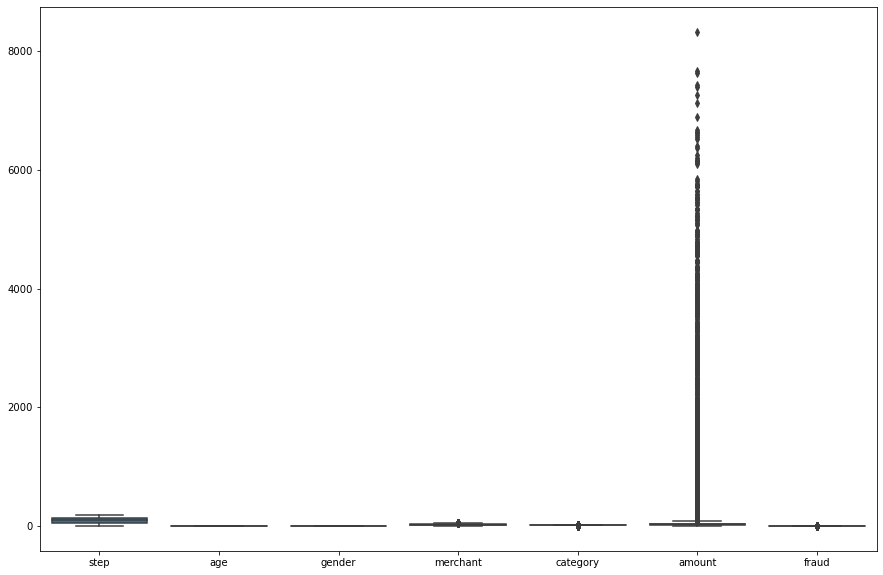

In [28]:
ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df2)

It noticed that the values of features are very wide range, and it will have inappropriate influence result when apply machine learning algorithms. 

Therefore, the values of features should normalise the variables. The purpose of normalization is to make all data in the same scale in every feature.

##### Dividing the dataset 

In [29]:
X = df2.drop(['fraud'], axis=1)
y = df2['fraud']

##### MinMaxScaler for min-max normalization

In [30]:
minMaxScaler = MinMaxScaler().fit(X)
X_processed = minMaxScaler.transform(X)

df_processed = pd.DataFrame(X_processed, columns=X.columns)
df_processed

,step,age,gender,merchant,category,amount
0,0.949721,0.714286,0.333333,0.612245,0.857143,0.002796
1,0.826816,0.285714,0.333333,0.612245,0.857143,0.000976
2,0.100559,0.571429,0.666667,0.612245,0.857143,0.000053
3,0.770950,0.285714,0.333333,0.224490,0.142857,0.003113
4,0.893855,0.428571,0.666667,0.183673,0.000000,0.002750
...,...,...,...,...,...,...
594638,0.597765,0.428571,0.333333,0.612245,0.857143,0.003220
594639,0.564246,0.285714,0.666667,0.367347,0.857143,0.002160
594640,0.357542,0.285714,0.333333,0.612245,0.857143,0.004251
594641,0.262570,0.571429,0.666667,0.612245,0.857143,0.005669


##### Showing the boxplot after min-max normalization

<AxesSubplot:>

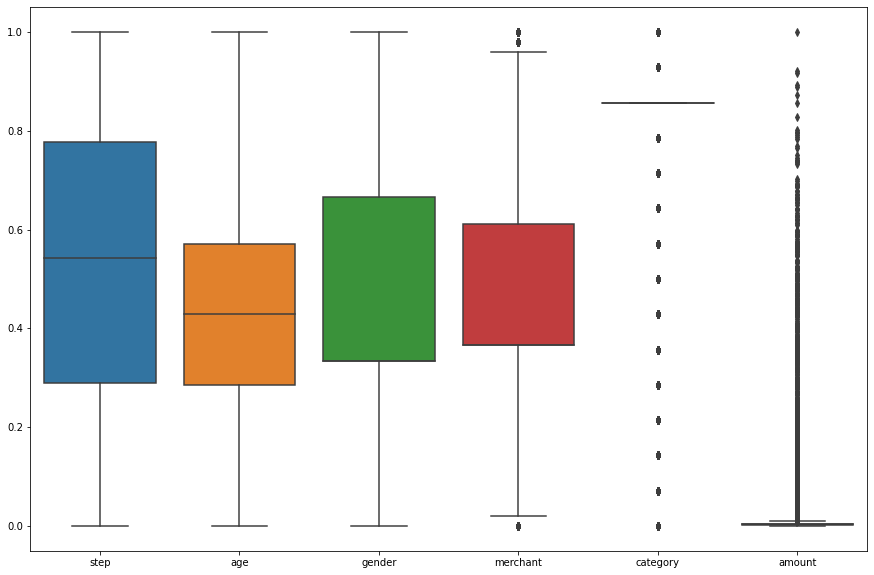

In [31]:
ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_processed)

##### The predictor variables (X) and the variable to predict (y) are selected.


In [32]:
X = df_processed[['step','age','gender','merchant','category','amount']] # the data is normalizated 
y = df2[['fraud']]

print(X.head(),"\n")
print(y.head())

       step       age    gender  merchant  category    amount
0  0.949721  0.714286  0.333333  0.612245  0.857143  0.002796
1  0.826816  0.285714  0.333333  0.612245  0.857143  0.000976
2  0.100559  0.571429  0.666667  0.612245  0.857143  0.000053
3  0.770950  0.285714  0.333333  0.224490  0.142857  0.003113
4  0.893855  0.428571  0.666667  0.183673  0.000000  0.002750 

        fraud
558842      0
477295      0
47151       0
439875      0
521435      0


##### Synthetic Minority Oversampling Technique (SMOTE)

In [33]:
y[y==1].count()

fraud    7200
dtype: int64

We find that fraudulent transactions represent 1.2% of the total, and the imbalance of the dataset can be corroborated.

##### Transform the Dataset

In [34]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

fraud
0        587443
1        587443
dtype: int64


Once SMOTE is applied to balance the dataset, the results show that we have the exact number of class instances (1 and 0)

SMOTE will create new data of the minority class using the neighboring instances, so the generated samples are not exact copies, but are similar to the instances we have.

##### The Train Test Split is performed to divide the test training.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res,y_res,test_size=0.3,
    random_state=42,
    shuffle=True,
    stratify=y_res)

### Evaluations

#### Gaussian Naive Bayes

In [79]:
t = time.process_time()

elapsed_time = time.process_time() - t

nb = GaussianNB()
nb.fit(X_train,y_train.values.ravel())
y_test_pred = nb.predict(X_test)

print("Classification Report for GaussianNB: \n", classification_report(y_test, y_test_pred))

print("The processing time of GaussianNB (in second):")
elapsed_time = time.process_time() - t
print(elapsed_time)

Classification Report for GaussianNB: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91    176233
           1       0.91      0.91      0.91    176233

    accuracy                           0.91    352466
   macro avg       0.91      0.91      0.91    352466
weighted avg       0.91      0.91      0.91    352466

The processing time of GaussianNB (in second):
0.4464229999999816


##### Showing confusion matrix heatmap

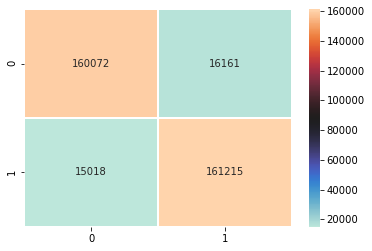

In [80]:
y_pred = nb.predict(X_test)
cm_nb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_nb,cmap='icefire',annot=True,linewidth=1,fmt='d')
plt.show()

#### Logistic Regression

In [72]:
t = time.process_time()

elapsed_time = time.process_time() - t

lr = LogisticRegression()

lr.fit(X_train,y_train.values.ravel())
y_test_pred = lr.predict(X_test)


print("Classification Report for Logistic Regression: \n", 
      classification_report(y_test, y_test_pred))

print("The processing time of Logistic Regression (in second):")
elapsed_time = time.process_time() - t
print(elapsed_time)

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    176233
           1       0.96      0.90      0.93    176233

    accuracy                           0.93    352466
   macro avg       0.93      0.93      0.93    352466
weighted avg       0.93      0.93      0.93    352466

The processing time of Logistic Regression (in second):
8.987823000000049


##### Showing confusion matrix heatmap

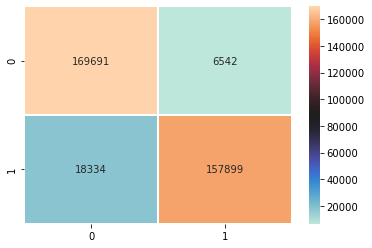

In [77]:
y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_lr,cmap='icefire',annot=True,linewidth=1,fmt='d')
plt.show()

#### Support Vector Machine

In [81]:
t = time.process_time()

elapsed_time = time.process_time() - t

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train,y_train)
y_test_pred = svm.predict(X_test)

print("Classification Report for SVM: \n", classification_report(y_test, y_test_pred))

print("The processing time of Support Vector Machine (in second):")
elapsed_time = time.process_time() - t
print(elapsed_time)

/Users/ysl/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Classification Report for SVM: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94    176233
           1       0.96      0.91      0.93    176233

    accuracy                           0.94    352466
   macro avg       0.94      0.94      0.94    352466
weighted avg       0.94      0.94      0.94    352466

The processing time of Support Vector Machine (in second):
39809.514157


##### Showing confusion matrix heatmap

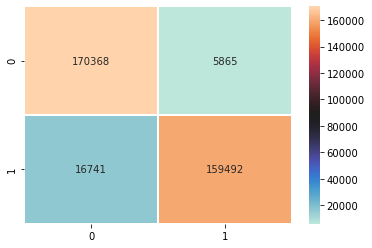

In [83]:
y_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svm,cmap='icefire',annot=True,linewidth=1,fmt='d')
plt.show()

#### Random Forest

In [42]:
t = time.process_time()

elapsed_time = time.process_time() - t

rf = RandomForestClassifier()

rf.fit(X_train,y_train.values.ravel())
y_test_pred = rf.predict(X_test)

print("Classification Report for Random Forest Classifier: \n", 
      classification_report(y_test, y_test_pred))

print("The processing time of Random Forest (in second):")
elapsed_time = time.process_time() - t
print(elapsed_time)

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

The processing time of Random Forest (in second):
64.38616200000001


##### Showing confusion matrix heatmap

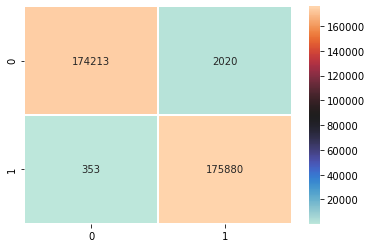

In [78]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf,cmap='icefire',annot=True,linewidth=1,fmt='d')
plt.show()

#### K-nearest Neighbors Classifier

In [75]:
t = time.process_time()

elapsed_time = time.process_time() - t

knn = KNeighborsClassifier()

knn.fit(X_train,y_train.values.ravel())
y_test_pred = knn.predict(X_test)

print("Classification Report for K-nearest Neighbors Classifier: \n", classification_report(y_test, y_test_pred))

print("The processing time of K-nearest Neighbors Classifier (in second):")
elapsed_time = time.process_time() - t
print(elapsed_time)

Classification Report for K-nearest Neighbors Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    176233
           1       0.98      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

The processing time of K-nearest Neighbors Classifier (in second):
98.78400299999998


##### Showing confusion matrix heatmap

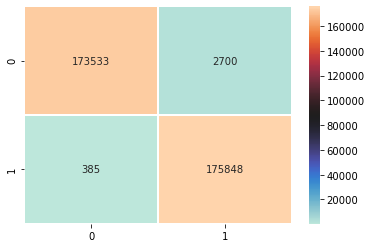

In [76]:
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,cmap='icefire',annot=True,linewidth=1,fmt='d')
plt.show()

The result comparsion

1. Random Forest, Accuracy Rate: 99%, Computational Cost: 1m4s
2. K-Nearest Neighbor, Accuracy Rate: 99%, Computational Cost: 1m38s
3. Support Vector Machine Accuracy Rate: 94%, Computational Cost: 11h3m29s
4. Logistic Regression, Accuracy Rate: 93%, Computational Cost: 8s
5. Gaussian Naive Bayes, Accuracy Rate: 91%, Computational Cost: 0.4s